In [ ]:
from dataset import MUSDB18Segmented, root
musdb = MUSDB18Segmented(folder=root, is_wav=False, subsets=['test'], toy=1)

In [ ]:
import nussl
from nussl import AudioSignal
import torch
torch.no_grad()
from demucs.utils import apply_model
import load_models

In [ ]:
item = musdb[2]
nussl.core.play_utils.multitrack(item['sources'])
nussl.core.utils.visualize_sources_as_masks(item['sources'])

/home/ubuntu/anaconda3/envs/meta/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)
/home/ubuntu/anaconda3/envs/meta/lib/python3.7/site-packages/torch/functional.py:587: UserWarning: The function torch.irfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.irfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:602.)
  normalized, onesided, length, return_complex)



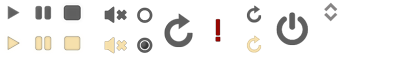
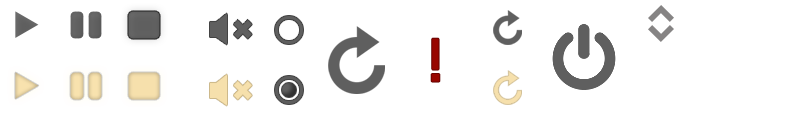
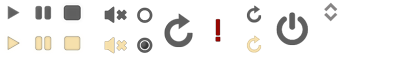

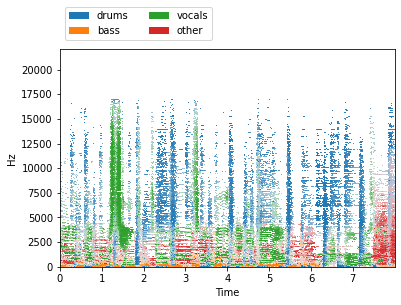

In [4]:
open_unmix = load_models.open_unmix()
open_unmix.cuda()
mix = item['mix'].cuda().unsqueeze(0)
estimates = open_unmix(mix)
nussl.core.play_utils.multitrack(estimates)
nussl.core.utils.visualize_sources_as_masks(estimates)


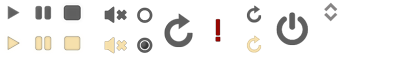
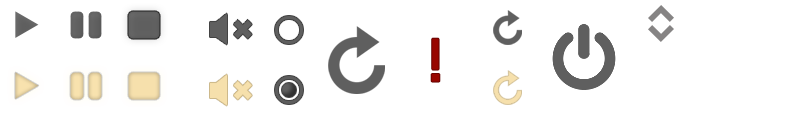
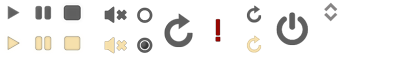

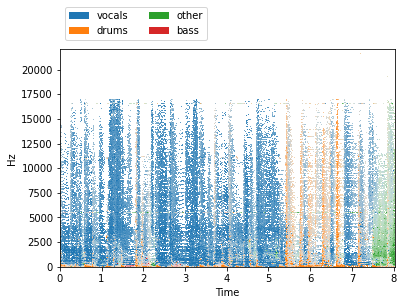

In [5]:
demucs = load_models.demucs()
demucs.cuda()
est = demucs(item['mix'].to('cuda'))
demucs.cpu()
nussl.core.play_utils.multitrack(est)
nussl.core.utils.visualize_sources_as_masks(est)


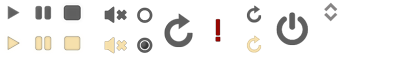
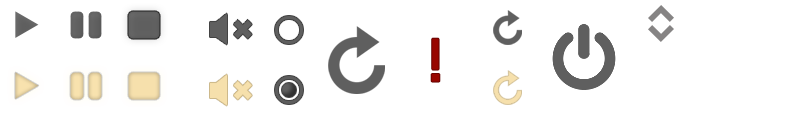
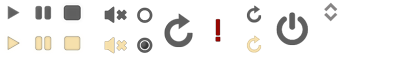

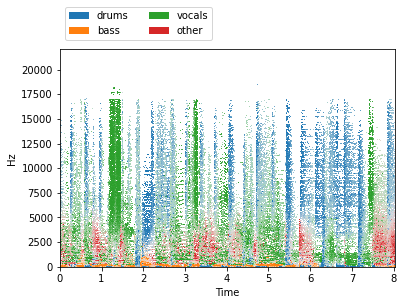

In [6]:
tasnet = load_models.tasnet()
tasnet.cuda()
est = tasnet(item['mix'].to('cuda'))
tasnet.cpu()
nussl.core.play_utils.multitrack(est)
nussl.core.utils.visualize_sources_as_masks(est)

In [4]:
wav_u_net = load_models.wav_u_net(item['mix'].size(-1))
wav_u_net.cuda()
est = wav_u_net(item['mix'][..., 0:wav_u_net.model.input_size].to('cuda'))
wav_u_net.cpu()
nussl.core.play_utils.multitrack(est)
nussl.core.utils.visualize_sources_as_masks(est)

Using valid convolutions with 363177 inputs and 353625 outputs


TypeError: expected np.ndarray (got Tensor)

In [ ]:
item['mix'][..., :(wav_u_net.model.input_size)].size()